In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [49]:
stock_symbol = 'AAPL'

str

In [5]:
df = yf.download(tickers=stock_symbol,period='5y',interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-04,47.910000,48.355000,47.837502,47.957500,45.831806,105064800
2018-06-05,48.267502,48.485001,48.090000,48.327499,46.185394,86264000
2018-06-06,48.407501,48.520000,47.980000,48.494999,46.345470,83734400
2018-06-07,48.535000,48.549999,48.084999,48.365002,46.221241,85388800
2018-06-08,47.792500,48.000000,47.442501,47.924999,45.800735,106627200


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54835000
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900


In [7]:
datas=df
datas=datas.reset_index()
datas.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-04,47.910000,48.355000,47.837502,47.957500,45.831806,105064800
1,2018-06-05,48.267502,48.485001,48.090000,48.327499,46.185394,86264000
2,2018-06-06,48.407501,48.520000,47.980000,48.494999,46.345470,83734400
3,2018-06-07,48.535000,48.549999,48.084999,48.365002,46.221241,85388800
4,2018-06-08,47.792500,48.000000,47.442501,47.924999,45.800735,106627200


In [8]:
hgh = df[['High']]

<Axes: xlabel='Date'>

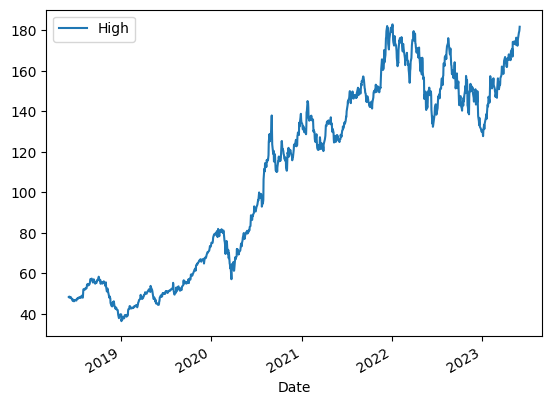

In [9]:
hgh.plot()

In [10]:
last_row_index = len(datas) - 1  # Calculate the index of the last row
present_year = datas.iloc[last_row_index, 0]

print(present_year)

2023-06-02 00:00:00


In [11]:
from datetime import datetime



present_year = datetime.now()


# Extracting the year from the Timestamp object
year = present_year.year

print(year)

2023


replacing each null with the mean of last 50 non-nan data

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [51]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label=f'Real {stock_symbol} Stock Price')
    plt.plot(predicted, color='blue',label=f'Predicted {stock_symbol} Stock Price')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{stock_symbol} Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [14]:
# Checking for missing values
dataset=df
training_set = dataset[:year-1].iloc[:,1:2].values
test_set = dataset[year:].iloc[:,1:2].values

In [15]:
training_set = dataset[:year-1].iloc[:,1:2].values

In [16]:
print(training_set)

[[ 48.35499954]
 [ 48.48500061]
 [ 48.52000046]
 ...
 [179.3500061 ]
 [180.11999512]
 [181.77999878]]


In [17]:
from dateutil.relativedelta import relativedelta

current_date = datetime.now()
six_months_ago = current_date - relativedelta(months=6)

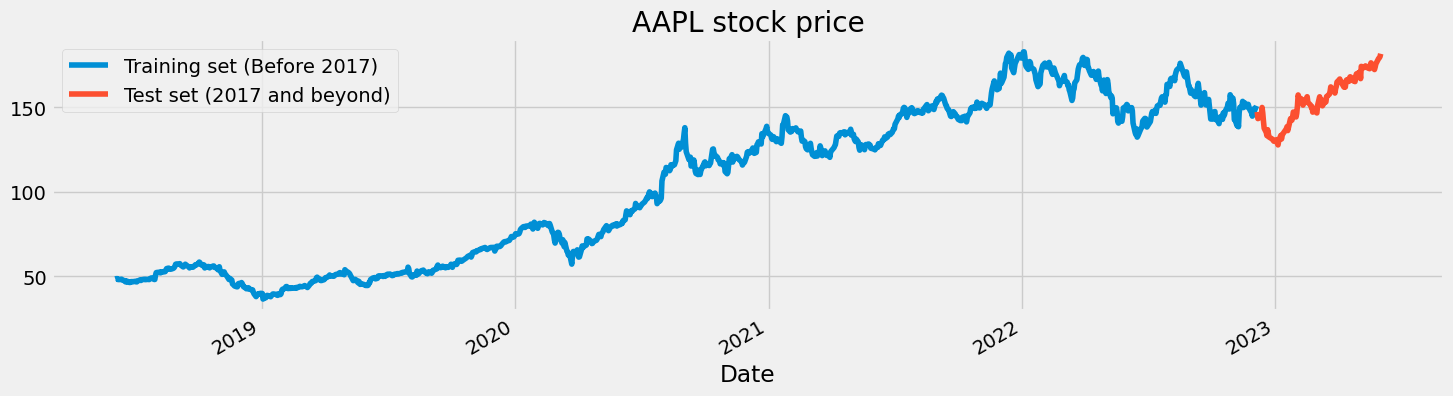

In [50]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:six_months_ago].plot(figsize=(16,4),legend=True)
dataset["High"][six_months_ago:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title(f'{stock_symbol} stock price')
plt.show()

In [19]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(df.iloc[:,1:2].values)

In [21]:
p=training_set_scaled.shape
p[0]

1259

In [22]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(150,p[0]):
    X_train.append(training_set_scaled[i-150:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [24]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
35/35 [==============================] - 21s 252ms/step - loss: 0.0512
Epoch 2/50
35/35 [==============================] - 8s 223ms/step - loss: 0.0091
Epoch 3/50
35/35 [==============================] - 7s 201ms/step - loss: 0.0067
Epoch 4/50
35/35 [==============================] - 7s 190ms/step - loss: 0.0061
Epoch 5/50
35/35 [==============================] - 7s 196ms/step - loss: 0.0071
Epoch 6/50
35/35 [==============================] - 7s 197ms/step - loss: 0.0056
Epoch 7/50
35/35 [==============================] - 7s 201ms/step - loss: 0.0055
Epoch 8/50
35/35 [==============================] - 7s 187ms/step - loss: 0.0050
Epoch 9/50
35/35 [==============================] - 7s 189ms/step - loss: 0.0056
Epoch 10/50
35/35 [==============================] - 7s 191ms/step - loss: 0.0060
Epoch 11/50
35/35 [==============================] - 7s 187ms/step - loss: 0.0053
Epoch 12/50
35/35 [==============================] - 7s 188ms/step - loss: 0.0053
Epoch 13/50
35/35 [=====

In [25]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
#dataset_total = pd.concat((dataset["High"][:'2022-12-31'],dataset["High"]['2023-01-01':]),axis=0)
dataset_total=hgh
inputs = dataset_total[len(dataset_total)- 150:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [26]:
test_set.shape

(0, 1)

In [27]:
inputs.shape

(150, 1)

In [28]:
import numpy as np

X_test = np.array(inputs[0:150, 0]).reshape(1, 150, 1)
predicted_values = []

for _ in range(30):
    predicted_stock_price = regressor.predict(X_test)
   #predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    predicted_values.append(predicted_stock_price[0, 0])
    
    # Update the input sequence by shifting and replacing the oldest value
    X_test = np.roll(X_test, -1, axis=1)
    X_test[:, -1, :] = predicted_stock_price
    #print(X_test)

predicted_values = np.array(predicted_values)


1/1 [==============================] - 0s 46ms/step


In [29]:
predicted_values=predicted_values.reshape(-1, 1)
predicted_values=sc.inverse_transform(predicted_values)

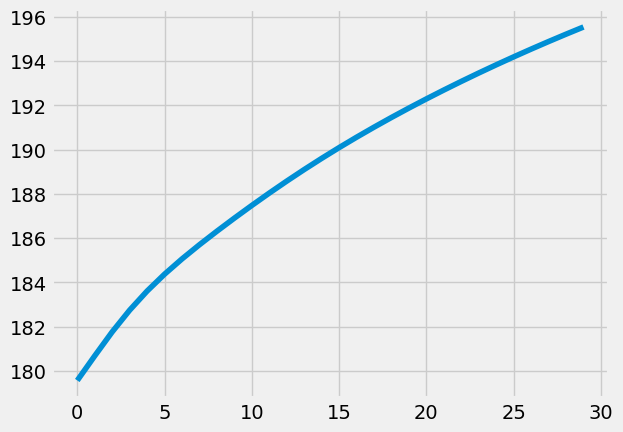

In [30]:
#plt.plot(test_set)
plt.plot(predicted_values)


In [31]:
training_set = dataset[:six_months_ago].iloc[:,1:2].values
test_set = dataset[six_months_ago:].iloc[:,1:2].values

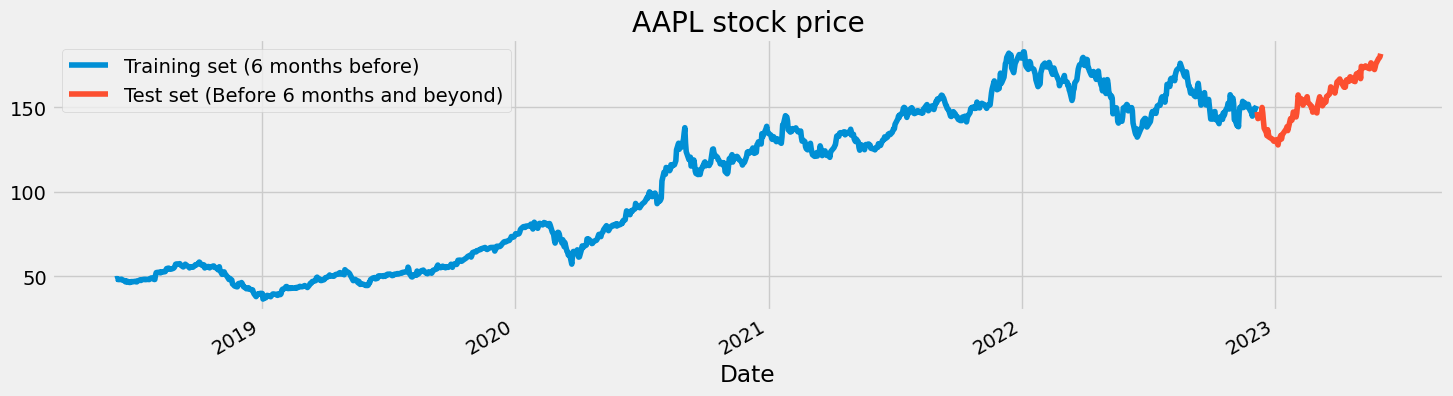

In [52]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
df["High"][:six_months_ago].plot(figsize=(16,4),legend=True)
df["High"][six_months_ago:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (6 months before)','Test set (Before 6 months and beyond)'])
plt.title(f'{stock_symbol} stock price')
plt.show()

In [33]:
ma100=df.High.rolling(100).mean()
ma100

Date
2018-06-04         NaN
2018-06-05         NaN
2018-06-06         NaN
2018-06-07         NaN
2018-06-08         NaN
                ...   
2023-05-26    157.2133
2023-05-30    157.7166
2023-05-31    158.2324
2023-06-01    158.7307
2023-06-02    159.2144
Name: High, Length: 1259, dtype: float64

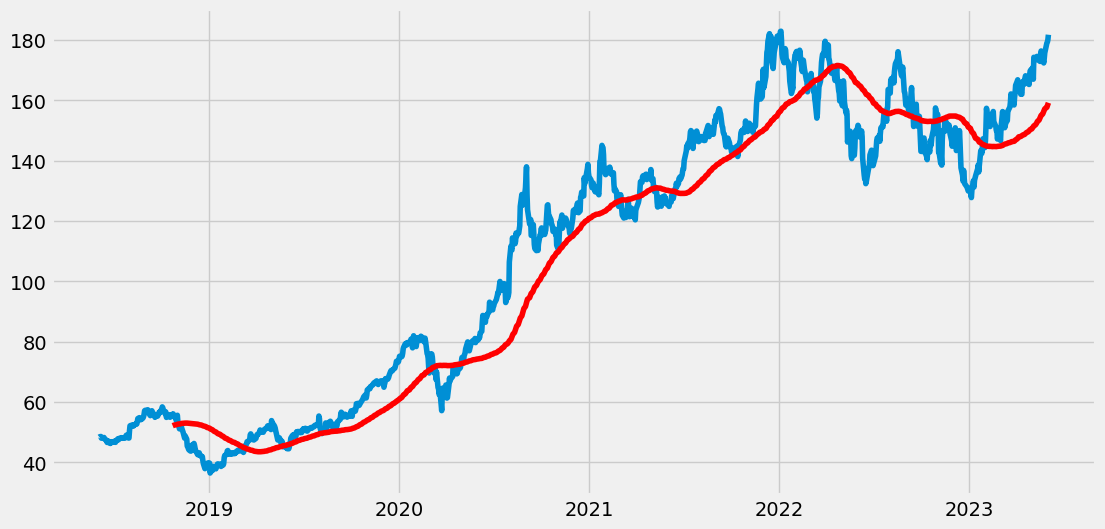

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.High)
plt.plot(ma100,'r')

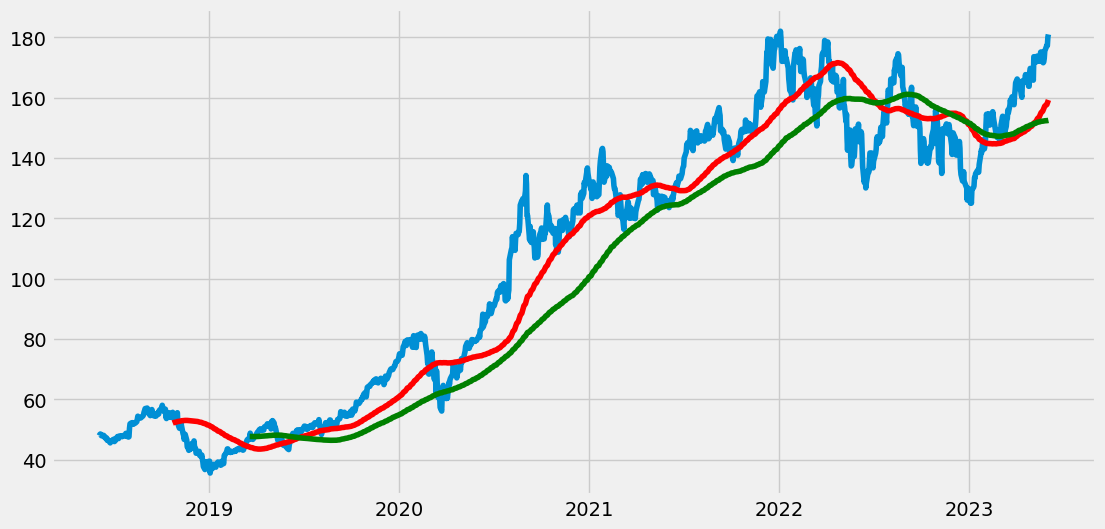

In [35]:
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [36]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [37]:
p=training_set_scaled.shape
p[0]

1136

In [38]:
X_train = []
y_train = []
for i in range(150,p[0]):
    X_train.append(training_set_scaled[i-150:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [39]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [40]:
dataset_total = hgh
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [41]:
q=inputs.shape

In [42]:
X_test = []
for i in range(60,q[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 2s 22ms/step


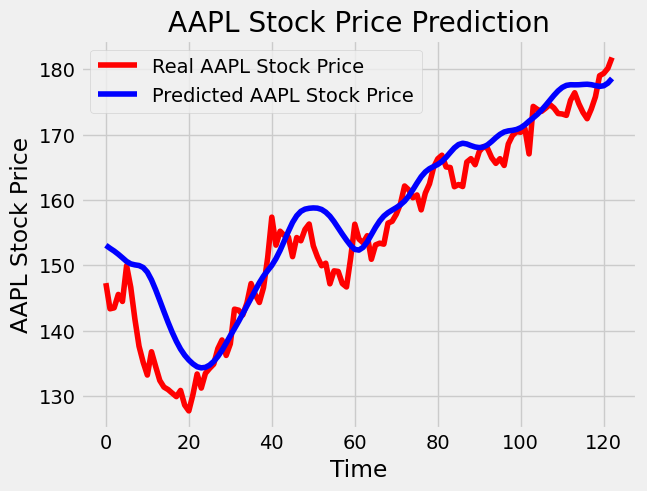

In [53]:
plot_predictions(test_set,predicted_stock_price)

In [44]:
concatenated_array = np.concatenate((predicted_stock_price, predicted_values), axis=0)

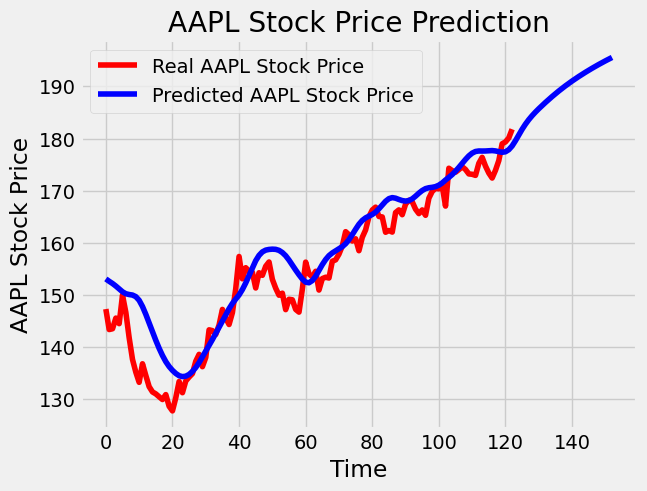

In [54]:
plot_predictions(test_set,concatenated_array)